## Health Care Domain-1016-Heart Diesease Prediction

### Problem Statement

***Task 1 :-*** Prepare a complete data analysis report on the given data.
***Task 2 :-***-Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

***Task 3 :-*** Suggestions to the Hospital to awake the predictions of heart diseases 
prevent life threats.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('values.csv')
df2 = pd.read_csv('labels.csv')
data = pd.merge(df1,df2,how='inner')

In [13]:
# data.to_csv('Merged_file.csv',index=False)

In [2]:
data = pd.read_csv('Merged_file.csv')

In [3]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [4]:
data.drop('patient_id',axis=1,inplace=True)  ## this column is not import for my model

In [5]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [7]:
data.shape

(180, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [9]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
data.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [11]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
num_col = data.select_dtypes(include=['int','float'])
num_col.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [13]:
num_col.shape

(180, 13)

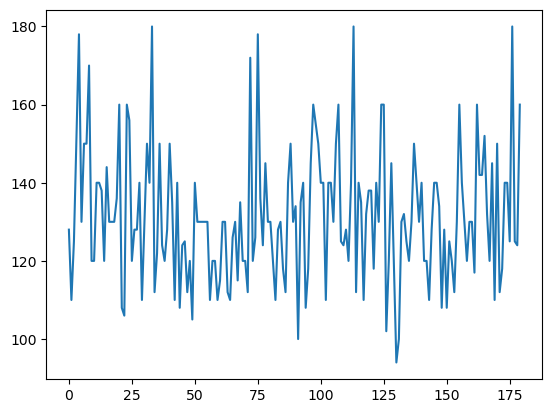

In [9]:
## visuazition
plt.plot(data['resting_blood_pressure'])

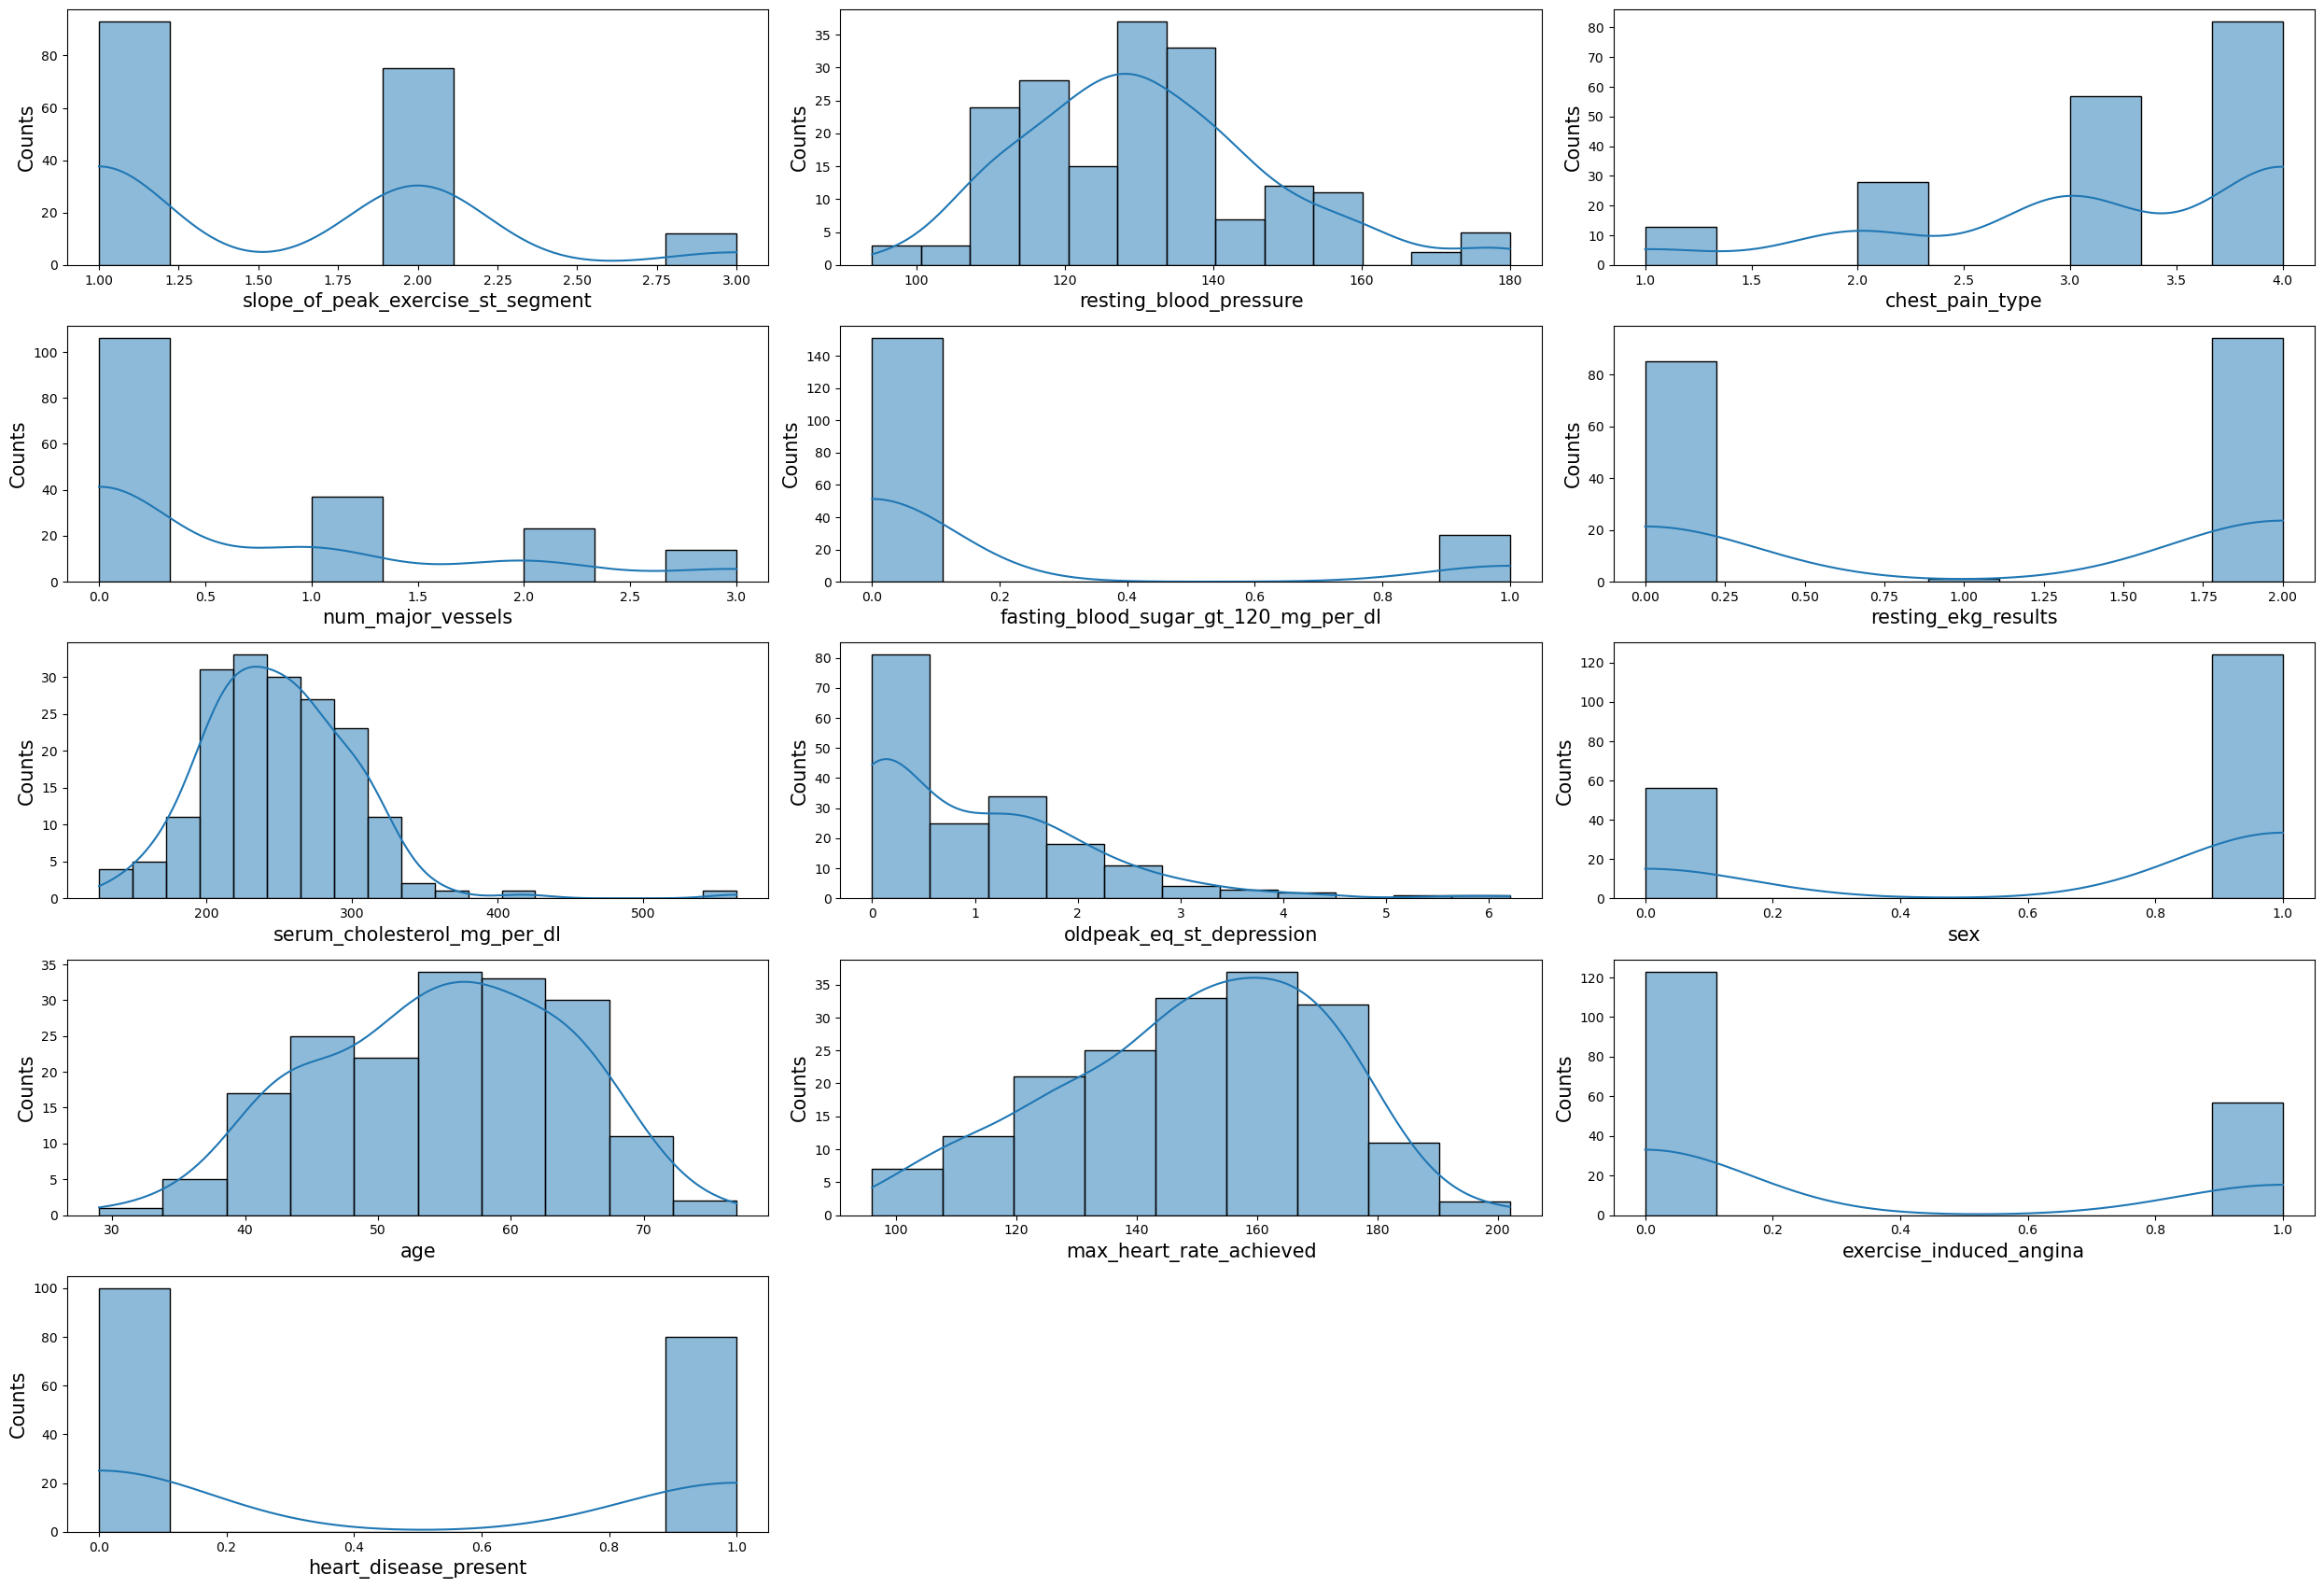

In [6]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=13:
        plt.subplot(6,3,plotnumber)
        sns.histplot(num_col[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [26]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


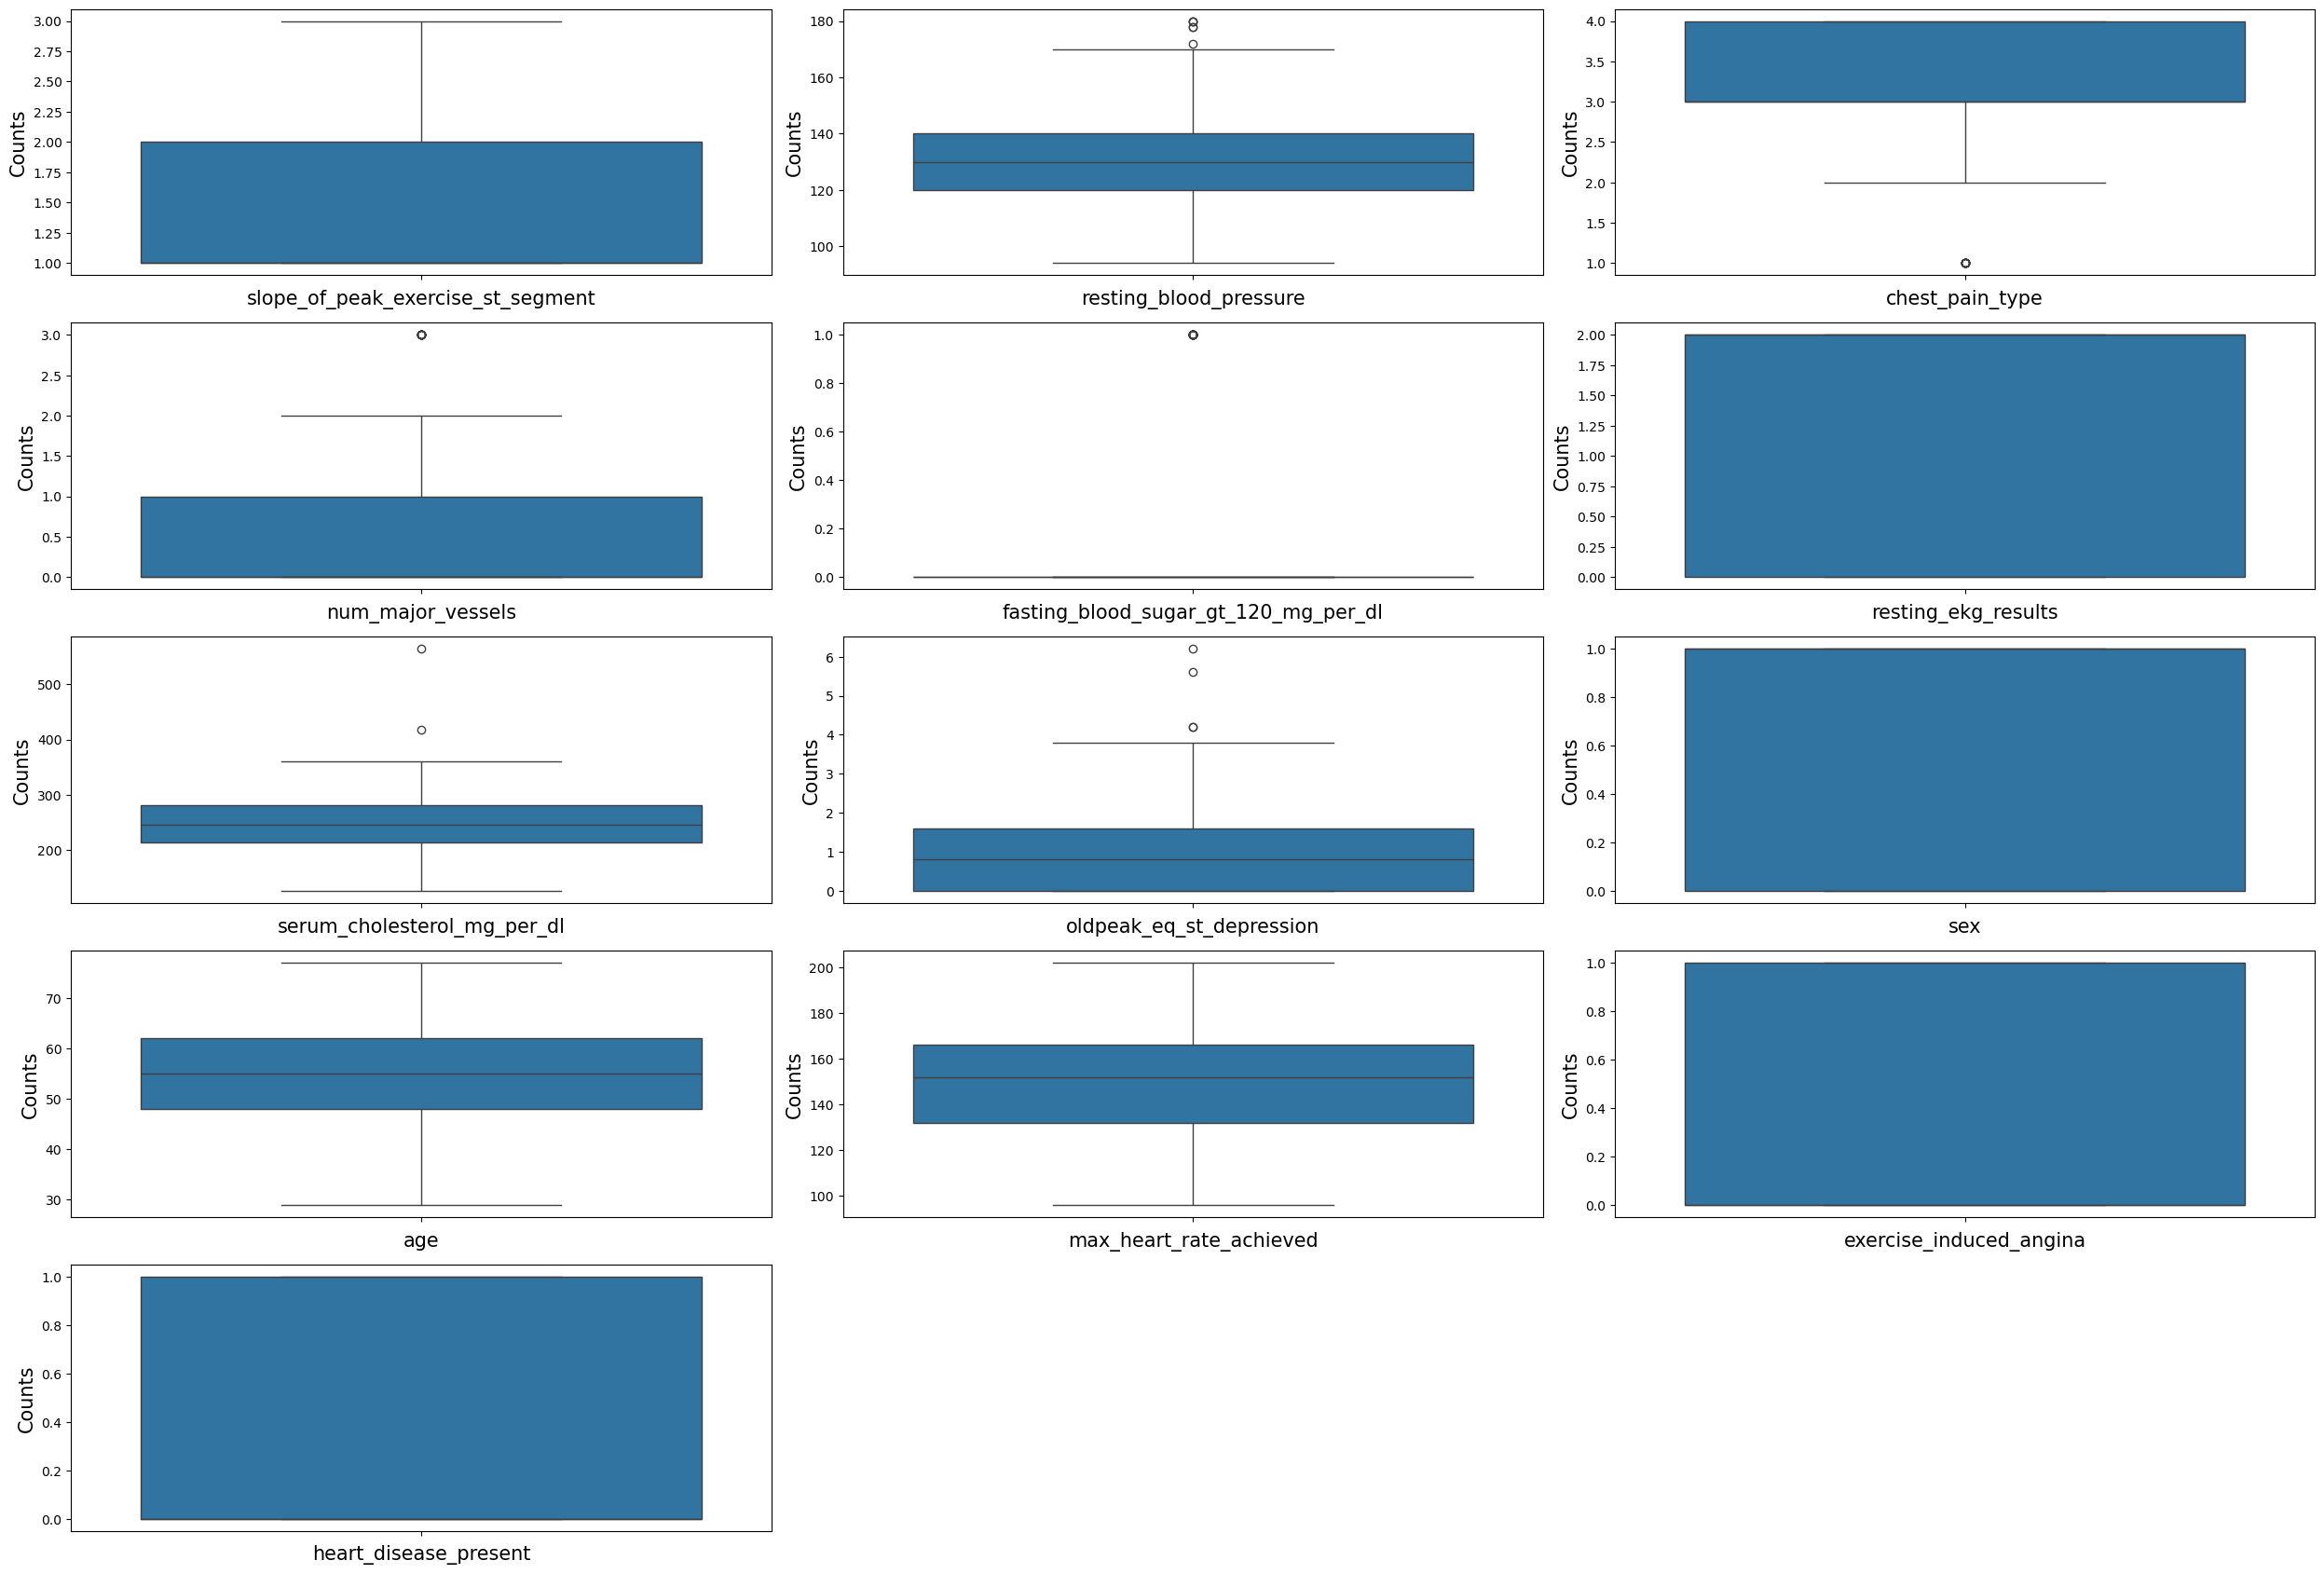

In [7]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=13:
        plt.subplot(6,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Axes: >

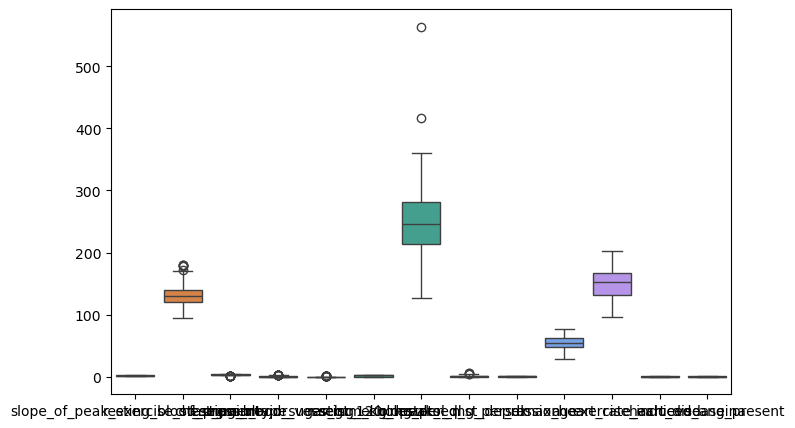

In [182]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data = num_col,ax = ax)

In [11]:
## slope_of_peak_exercise_st_segment
Q3 = data['slope_of_peak_exercise_st_segment'].quantile(0.75)
Q1 = data['slope_of_peak_exercise_st_segment'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [12]:
len(data.loc[data['slope_of_peak_exercise_st_segment']>upper_limit])/len(data)*100   ## cheking outliers in percentage

0.0

In [13]:
len(data.loc[data['slope_of_peak_exercise_st_segment']<lower_limit])/len(data)*100

0.0

There is no outliers in this column

In [14]:
## resting_blood_pressure
Q3 = data['resting_blood_pressure'].quantile(0.75)
Q1 = data['resting_blood_pressure'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [15]:
len(data.loc[data['resting_blood_pressure']>upper_limit])/len(data)*100

3.3333333333333335

In [16]:
data.loc[data['resting_blood_pressure']>upper_limit,'resting_blood_pressure'] = data['resting_blood_pressure'].median()

In [17]:
data.loc[data['resting_blood_pressure']>upper_limit]  ## handle the outlier

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [18]:
len(data.loc[data['resting_blood_pressure']<lower_limit])/len(data)*100   ## there is no outliers in lower limit

0.0

In [19]:
## chest_pain_type
Q3 = data['chest_pain_type'].quantile(0.75)
Q1 = data['chest_pain_type'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [20]:
len(data.loc[data['chest_pain_type']>upper_limit])/len(data)*100

0.0

In [21]:
len(data.loc[data['chest_pain_type']<lower_limit])/len(data)*100

7.222222222222221

In [22]:
data.loc[data['chest_pain_type']<lower_limit].shape

(13, 14)

The column lower_limit has an outlier percetage of 7%, but since the dataset is small and the data is important for my model, I am choosing not to handle these outliers.

In [23]:
## num_major_vessels
Q3 = data['num_major_vessels'].quantile(0.75)
Q1 = data['num_major_vessels'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [24]:
len(data.loc[data['num_major_vessels']>upper_limit])/len(data)*100

7.777777777777778

The column uper_limit has an outlier percetage of 7%, but since the dataset is small and the data is important for my model, I am choosing not to handle these outliers.

In [25]:
len(data.loc[data['num_major_vessels']<lower_limit])/len(data)*100   ## there is no outlier

0.0

In [26]:
## fasting_blood_sugar_gt_120_mg_per_dl
Q3 = data['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.75)
Q1 = data['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [27]:
len(data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>upper_limit])/len(data)*100

16.11111111111111

This column uper_limit has an outlier percetage of 16%. Since it is a large dataset, I have decided not to handle these outliers.

In [28]:
len(data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']<lower_limit])/len(data)*100

0.0

In [29]:
## serum_cholesterol_mg_per_dl
Q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)
Q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [30]:
len(data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit])/len(data)*100

1.1111111111111112

In [31]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit,'serum_cholesterol_mg_per_dl'] = data['serum_cholesterol_mg_per_dl'].median()

In [32]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [33]:
len(data.loc[data['serum_cholesterol_mg_per_dl']<lower_limit])/len(data)*100   ## there is no outlier

0.0

In [34]:
## oldpeak_eq_st_depression
Q3 = data['oldpeak_eq_st_depression'].quantile(0.75)
Q1 = data['oldpeak_eq_st_depression'].quantile(0.25)
IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [35]:
len(data.loc[data['oldpeak_eq_st_depression']>upper_limit])/len(data)*100

2.2222222222222223

In [36]:
data.loc[data['oldpeak_eq_st_depression']>upper_limit,'oldpeak_eq_st_depression'] = data['oldpeak_eq_st_depression'].median()

In [37]:
data.loc[data['oldpeak_eq_st_depression']>upper_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [38]:
len(data.loc[data['oldpeak_eq_st_depression']<lower_limit])/len(data)*100   ## there is no outlier

0.0

resting_ekg_results,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present.There columns is not need to handle the outliers.

In [39]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for i in num_col:
    if plotnumber<=13:
        plt.subplot(6,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

NameError: name 'num_col' is not defined

<Figure size 2500x2000 with 0 Axes>

In [35]:
## Encoding using map

In [34]:
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [40]:
data.thal = data.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0


<Axes: >

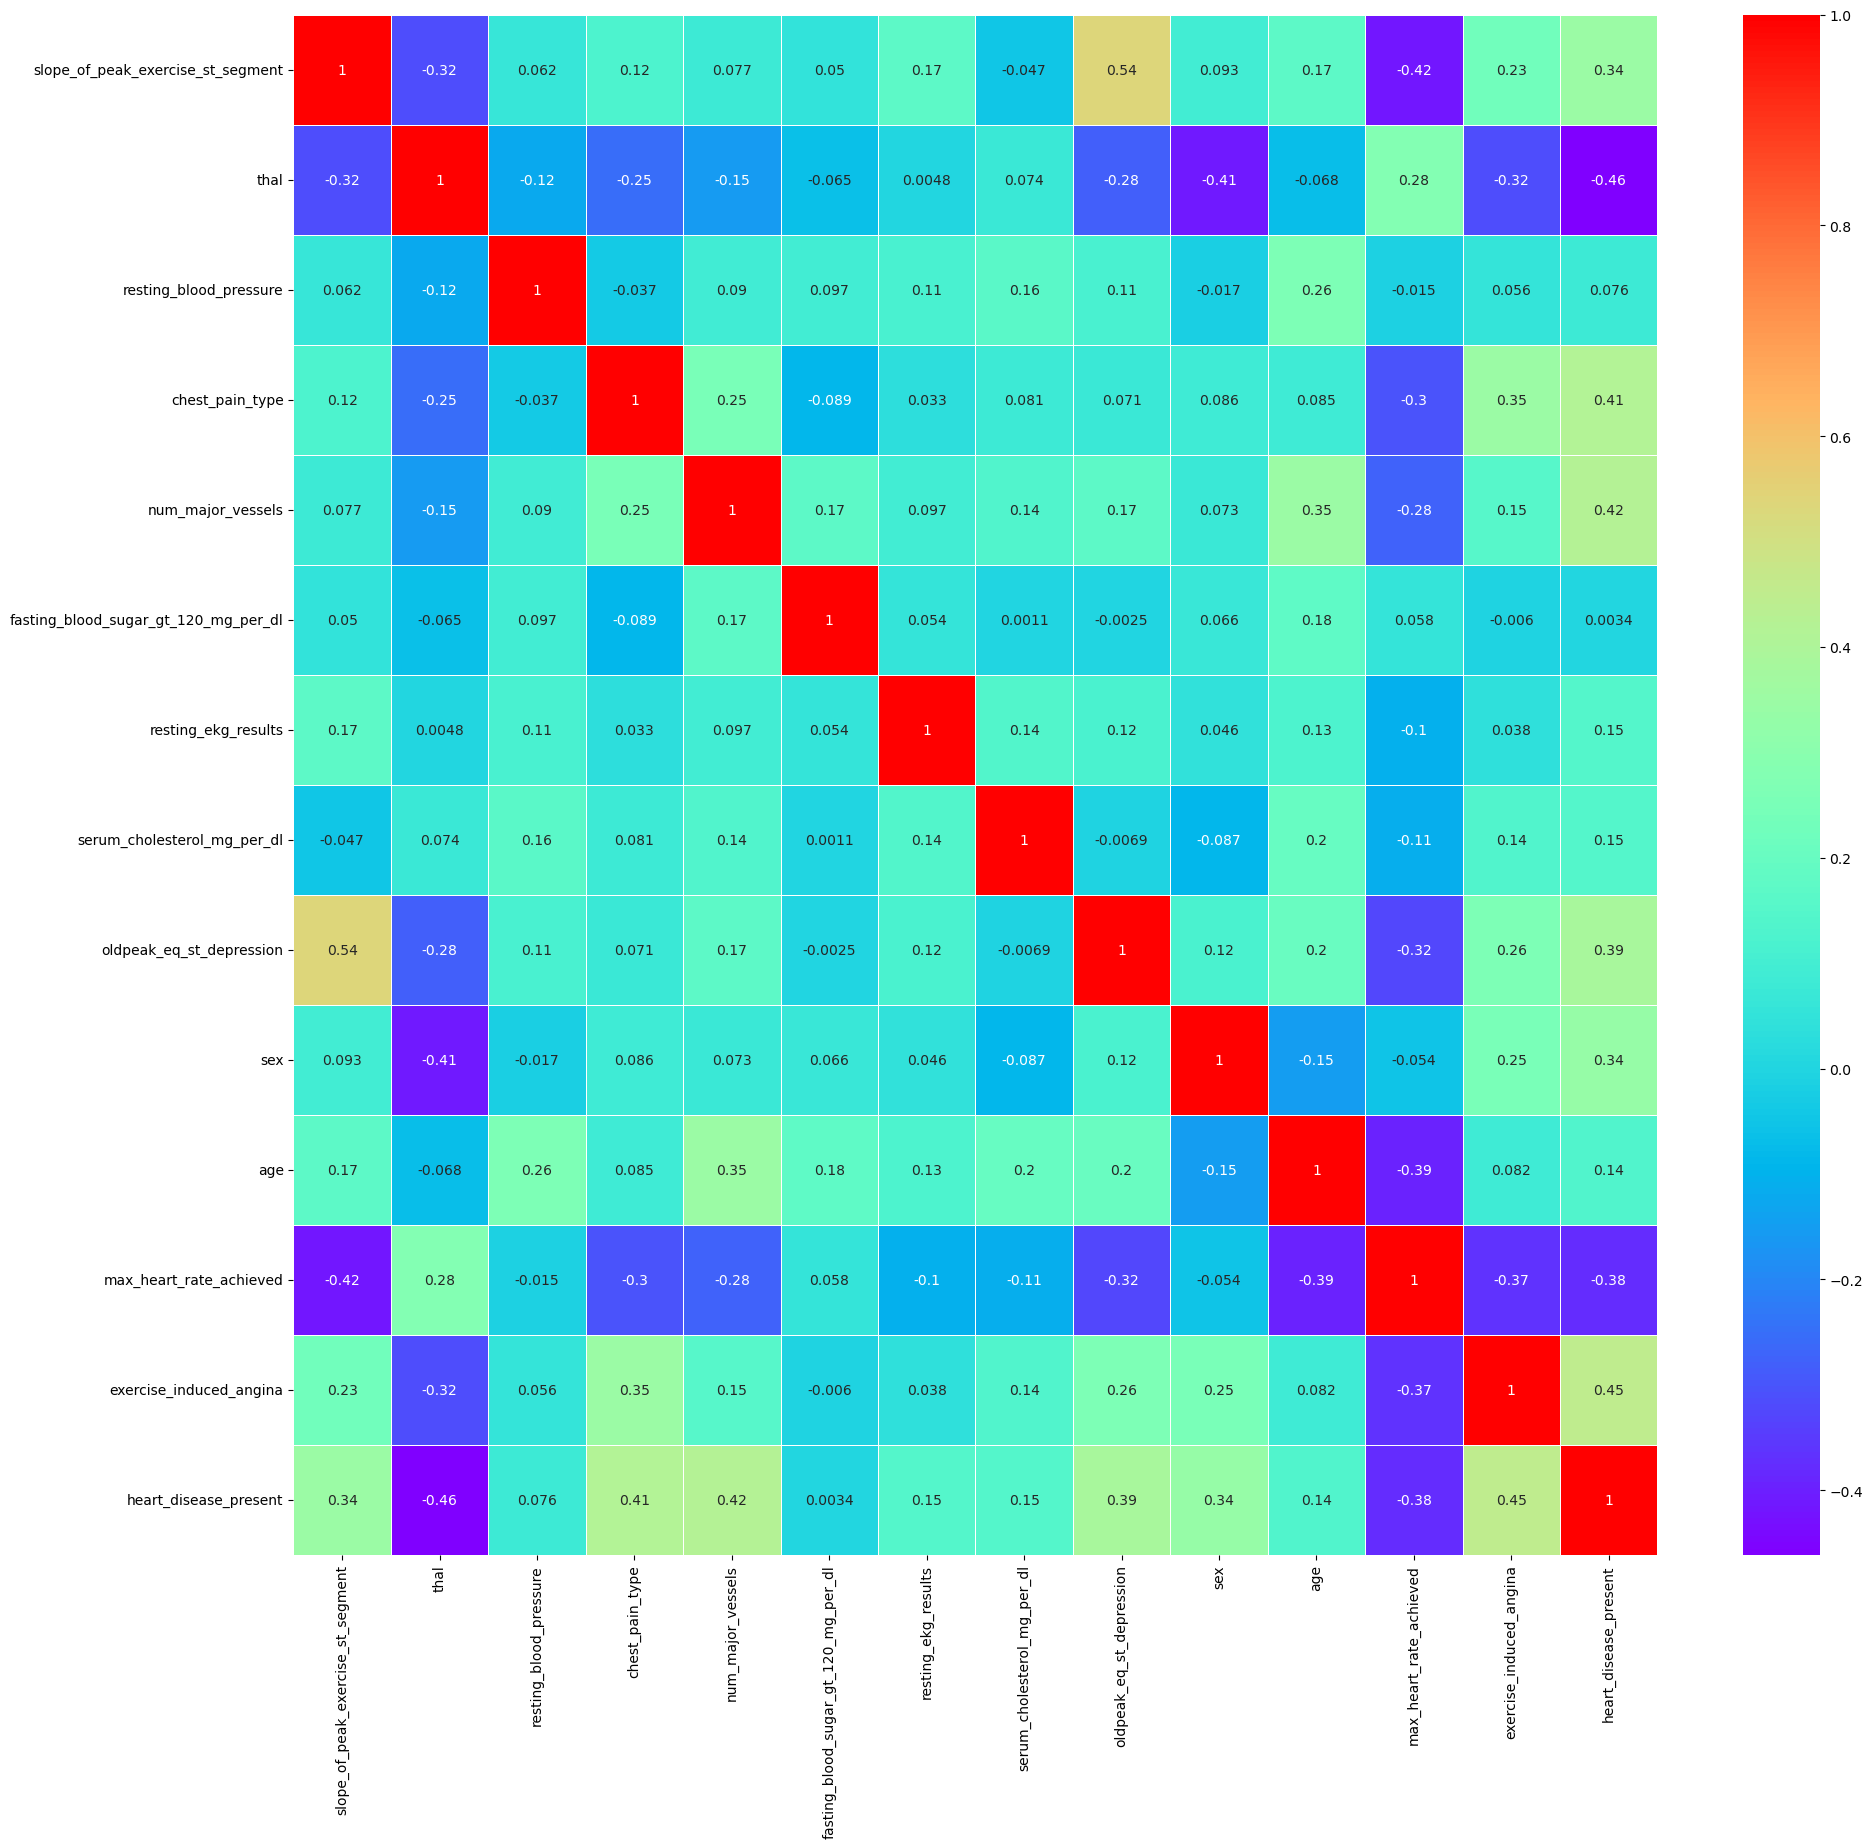

In [36]:
plt.figure(figsize=(22,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,cmap='rainbow')

In [41]:
## copy the data
data1 = data.copy()

In [42]:
# scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data1[['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']] = scale.fit_transform(data1[['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']])

In [43]:
## create X and y
X = data1.drop('heart_disease_present',axis=1)
y = data1.heart_disease_present

In [44]:
X.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.891241,0.858898,-0.117432,-1.234775,-0.718403,-0.438238,0.953850,1.358696,-0.985690,0.672022,-1.053964,0.932485,-0.680746
1,0.729197,0.858898,-1.352755,-0.166220,-0.718403,-0.438238,-1.054255,-0.717635,0.736875,-1.488048,-0.087134,0.387084,-0.680746


In [45]:
y.head(2)

0    0
1    0
Name: heart_disease_present, dtype: int64

In [46]:
## split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=14)

In [47]:
X_train.shape

(144, 13)

In [48]:
y_test.shape

(36,)

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)
print('Actual value',Counter(y_train))
print('SMOTE value',Counter(y_smote))

Actual value Counter({0: 79, 1: 65})
SMOTE value Counter({1: 79, 0: 79})


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_smote,y_smote)
dt_pred = dt.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,classification_report

In [64]:
accuracy_score(y_test,dt_pred)

0.75

In [65]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.80      0.53      0.64        15

    accuracy                           0.75        36
   macro avg       0.77      0.72      0.72        36
weighted avg       0.76      0.75      0.74        36



In [66]:
pd.crosstab(y_test,dt_pred)

col_0,0,1
heart_disease_present,,
0,19,2
1,7,8


In [66]:
## hyperparameter tuning

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' :('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf':(list(range(1,20)))
}

dt2 = DecisionTreeClassifier()
grid_search = GridSearchCV(dt2, params, cv=3, n_jobs =-1,verbose=1,scoring = 'accuracy')


grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(f'Best_params:{best_params}')

In [67]:
dt2 = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 15,
                             min_samples_leaf = 5,
                             min_samples_split = 2,
                             splitter = 'random')
dt2.fit(X_smote,y_smote)
dt2_pred = dt2.predict(X_test)
print(f'Accuracy_score:{accuracy_score(dt2_pred,y_test)}')

Accuracy_score:0.75


In [68]:
print(classification_report(y_test,dt2_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.67      0.80      0.73        15

    accuracy                           0.75        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.76      0.75      0.75        36



In [69]:
pd.crosstab(y_test,dt2_pred)

col_0,0,1
heart_disease_present,,
0,15,6
1,3,12


In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt2,X,y,cv=3,scoring='accuracy')
print(f'Score{scores}')
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

Score[0.76666667 0.86666667 0.75      ]
Cross validation Score: 0.7944444444444444
Std : 0.05152010275275391


In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=12)
rf.fit(X_smote,y_smote)
rf_pred = rf.predict(X_test)

In [144]:
accuracy_score(y_test,rf_pred)

0.8055555555555556

In [145]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.83      0.67      0.74        15

    accuracy                           0.81        36
   macro avg       0.81      0.79      0.79        36
weighted avg       0.81      0.81      0.80        36



In [146]:
pd.crosstab(y_test,rf_pred)

col_0,0,1
heart_disease_present,,
0,19,2
1,5,10


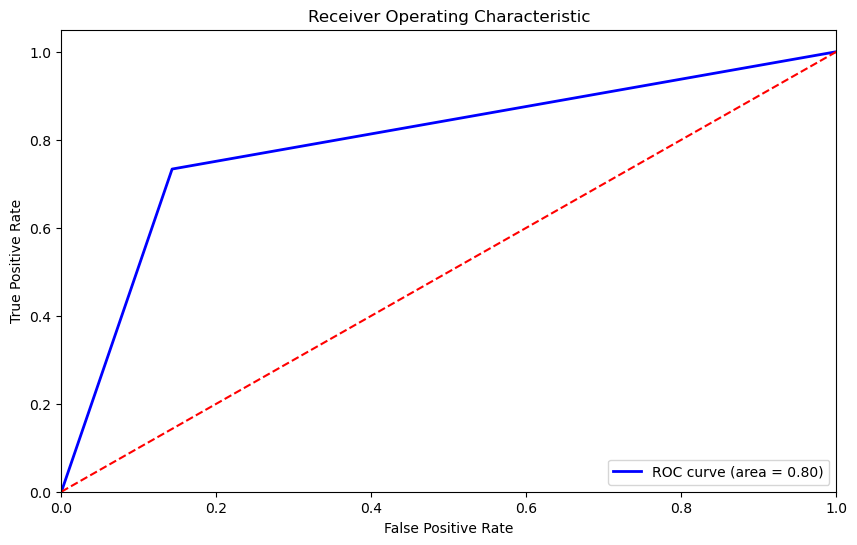

In [113]:
from sklearn.metrics import roc_curve, auc

# If you have probabilities for the positive class
# y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


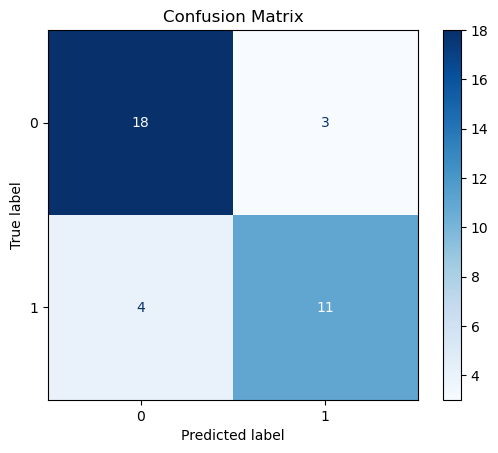

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your actual values (y_test) and predicted values (predictions)
# For demonstration, let's assume you used a classifier model.
# predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': True}


In [153]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(n_estimators=2,
                           min_samples_split=2,
                           min_samples_leaf=6,
                           max_features='auto',
                           max_depth=15,
                           bootstrap=False)
rf.fit(X_smote,y_smote)
rf_pred = rf.predict(X_test)

In [154]:
accuracy_score(rf_pred,y_test)

0.8055555555555556

In [159]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smote,y_smote)
lr_pred = lr.predict(X_test)

In [160]:
accuracy_score(lr_pred,y_test)

0.7222222222222222

In [161]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.65      0.73      0.69        15

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



In [162]:
pd.crosstab(y_test,lr_pred)

col_0,0,1
heart_disease_present,,
0,15,6
1,4,11


In [167]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(y_test,svc_pred))

0.75


In [168]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.71      0.67      0.69        15

    accuracy                           0.75        36
   macro avg       0.74      0.74      0.74        36
weighted avg       0.75      0.75      0.75        36



In [169]:
pd.crosstab(y_test,svc_pred)

col_0,0,1
heart_disease_present,,
0,17,4
1,5,10


In [179]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smote,y_smote)
xgb_pred = xgb.predict(X_test)
print(accuracy_score(y_test,xgb_pred))

0.7222222222222222


In [180]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.65      0.73      0.69        15

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.73      0.72      0.72        36



In [181]:
pd.crosstab(y_test,xgb_pred)

col_0,0,1
heart_disease_present,,
0,15,6
1,4,11


In [87]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0
